In [228]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
df = pd.read_csv("Supermarket Sales.csv")
df

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,3/3/2019,14:30,Cash,9.2
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,2/5/2019,11:32,Ewallet,4.6
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2/5/2019,10:41,Credit card,7.8
1004,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2/15/2019,12:44,Cash,8.4


In [230]:
df.isnull().sum()

Invoice ID       0
Branch           0
Yangon           0
Naypyitaw        0
Mandalay         0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           9
Total            3
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB


In [232]:
df.describe()

,Yangon,Naypyitaw,Mandalay,Quantity,Tax 5%,Total,Rating
count,1006.000000,1006.000000,1006.000000,1006.000000,997.000000,1003.000000,1006.000000
mean,0.338966,0.329026,0.332008,5.469185,15.479682,322.734689,7.056163
std,0.473594,0.470093,0.471168,3.014153,11.728320,245.865964,3.318751
min,0.000000,0.000000,0.000000,-8.000000,0.508500,10.678500,4.000000
25%,0.000000,0.000000,0.000000,3.000000,5.986500,123.789750,5.500000
50%,0.000000,0.000000,0.000000,5.000000,12.227500,254.016000,7.000000
75%,1.000000,1.000000,1.000000,8.000000,22.720500,471.009000,8.500000
max,1.000000,1.000000,1.000000,10.000000,49.650000,1042.650000,97.000000


In [233]:
df['Unit price'] = df['Unit price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['Unit price'] = pd.to_numeric(df['Unit price'], errors='coerce')
df['Quantity'] = df['Quantity'].abs()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [234]:
df['Tax 5%'] = df['Unit price'] * df['Quantity'] * 0.05
df['Total'] = df['Unit price'] * df['Quantity'] + df['Tax 5%']

In [235]:
def clean_and_convert_time(time_str):
    if pd.isna(time_str):
        return None
    time_str = re.sub(r'\s*-\s*', ':', time_str)
    for fmt in ['%I:%M %p', '%H:%M']:
        try:
            return pd.to_datetime(time_str, format=fmt, errors='coerce').strftime('%H:%M')
        except:
            continue
    return None

In [236]:
df['Time'] = df['Time'].apply(clean_and_convert_time)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

In [237]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Exclude columns that have all unique values (e.g., ID-like columns)
categorical_columns = [col for col in categorical_columns if df[col].nunique() < len(df) * 0.9]

for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique(), "\n")


Unique values in 'Branch':
['A' 'C' 'B'] 

Unique values in 'Customer type':
['Normal' '-' 'Member' 'Memberr'] 

Unique values in 'Gender':
['Male' 'Female'] 

Unique values in 'Product line':
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories'] 

Unique values in 'Time':
[datetime.time(13, 8) datetime.time(10, 29) datetime.time(13, 23)
 datetime.time(20, 30) datetime.time(10, 37) datetime.time(18, 30)
 datetime.time(14, 36) datetime.time(11, 38) datetime.time(17, 15)
 datetime.time(13, 27) datetime.time(18, 7) datetime.time(17, 3)
 datetime.time(10, 25) datetime.time(16, 48) datetime.time(19, 21)
 datetime.time(16, 19) datetime.time(11, 3) datetime.time(10, 39)
 datetime.time(18, 0) datetime.time(15, 30) datetime.time(11, 24)
 datetime.time(10, 40) datetime.time(12, 20) datetime.time(11, 15)
 datetime.time(17, 36) datetime.time(19, 20) datetime.time(15, 31)
 datetime.time(12, 17) datetime.time(19, 48) datet

In [238]:
valid_categories = {'Normal': 'Normal', 'Member': 'Member', 'Memberr': 'Member'}

df['Customer type'] = df['Customer type'].replace(valid_categories)
df = df[df['Customer type'].isin(valid_categories.values())]

In [239]:
df = df.drop_duplicates()

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     973 non-null    object        
 1   Branch         973 non-null    object        
 2   Yangon         973 non-null    int64         
 3   Naypyitaw      973 non-null    int64         
 4   Mandalay       973 non-null    int64         
 5   Customer type  973 non-null    object        
 6   Gender         973 non-null    object        
 7   Product line   973 non-null    object        
 8   Unit price     973 non-null    float64       
 9   Quantity       973 non-null    int64         
 10  Tax 5%         973 non-null    float64       
 11  Total          973 non-null    float64       
 12  Date           973 non-null    datetime64[ns]
 13  Time           973 non-null    object        
 14  Payment        973 non-null    object        
 15  Rating         973 non-null 

In [241]:
def get_city(row):
    if row['Yangon'] == 1:
        return 'Yangon'
    elif row['Naypyitaw'] == 1:
        return 'Naypyitaw'
    elif row['Mandalay'] == 1:
        return 'Mandalay'
    else:
        return 'Unknown'

In [242]:
df['City'] = df.apply(get_city, axis=1)
df.drop(columns=['Yangon', 'Naypyitaw', 'Mandalay'], inplace=True)

In [243]:
def categorize_time(time):
    if time is None:
        return 'Unknown'
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [244]:
df['Time of Day'] = df['Time'].apply(categorize_time)
df


,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating,City,Time of Day
0,750-67-8428,A,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,9.1,Yangon,Afternoon
1,226-31-3081,C,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,9.6,Naypyitaw,Morning
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,7.4,Yangon,Afternoon
3,123-19-1176,A,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:30:00,Ewallet,8.4,Yangon,Evening
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,5.3,Yangon,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,6.2,Naypyitaw,Afternoon
996,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,4.4,Mandalay,Evening
997,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,7.7,Yangon,Afternoon
998,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,4.1,Yangon,Afternoon


In [245]:
df['Weekday'] = df['Date'].dt.day_name()
df['Revenue per Item'] = df['Total'] / df['Quantity']
df['Is Weekend'] = df['Weekday'].apply(lambda x: 1 if x in ['Saturday', 'Friday'] else 0)
df

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating,City,Time of Day,Weekday,Revenue per Item,Is Weekend
0,750-67-8428,A,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,9.1,Yangon,Afternoon,Saturday,78.4245,1
1,226-31-3081,C,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,9.6,Naypyitaw,Morning,Friday,16.0440,1
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,7.4,Yangon,Afternoon,Sunday,48.6465,0
3,123-19-1176,A,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:30:00,Ewallet,8.4,Yangon,Evening,Sunday,61.1310,0
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,5.3,Yangon,Morning,Friday,90.6255,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,6.2,Naypyitaw,Afternoon,Tuesday,42.3675,0
996,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,4.4,Mandalay,Evening,Saturday,102.2490,1
997,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,7.7,Yangon,Afternoon,Saturday,33.4320,1
998,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,4.1,Yangon,Afternoon,Friday,69.1110,1


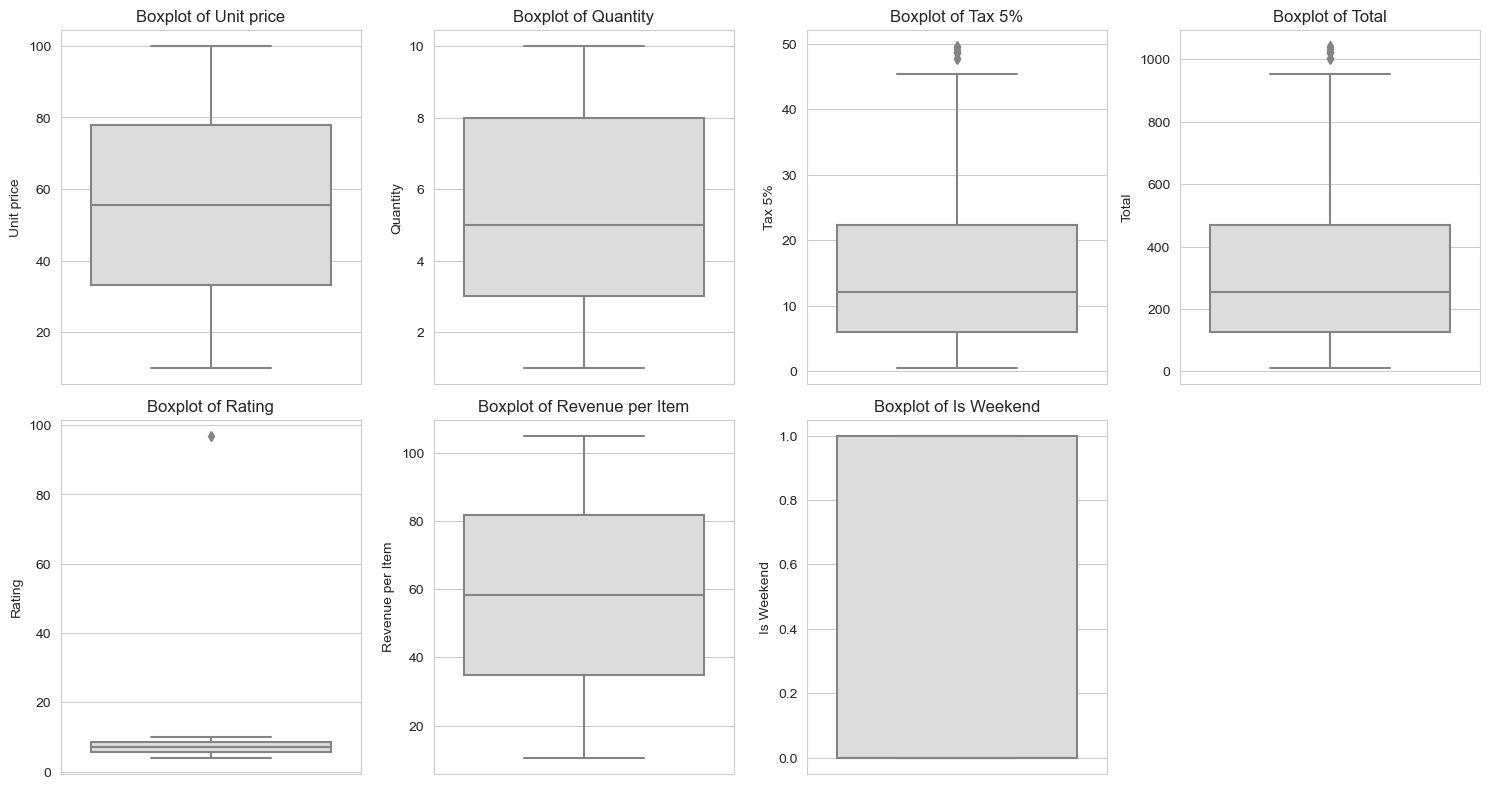

In [246]:
numerical_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols) // 2) + 1, i)  # Adjust layout
    sns.boxplot(y=df[col], palette="coolwarm")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


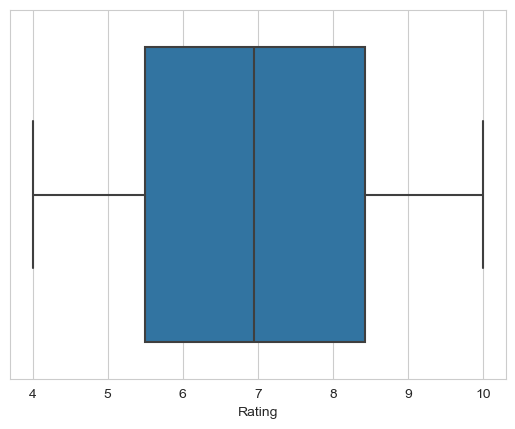

In [247]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]

sns.boxplot(x=df['Rating']);

In [258]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Rating,Revenue per Item,Is Weekend
count,972.000000,972.000000,972.000000,972.000000,972,972.000000,972.000000,972.000000
mean,55.827160,5.487654,15.312714,321.566994,2019-02-13 22:14:48.888888832,6.961214,58.618519,0.307613
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,4.000000,10.584000,0.000000
25%,33.247500,3.000000,5.971500,125.401500,2019-01-24 00:00:00,5.500000,34.909875,0.000000
50%,55.475000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,6.950000,58.248750,0.000000
75%,77.935000,8.000000,22.380750,469.995750,2019-03-08 00:00:00,8.425000,81.831750,1.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,10.000000,104.958000,1.000000
std,26.439984,2.914655,11.623855,244.100951,NaN,1.714417,27.761984,0.461743


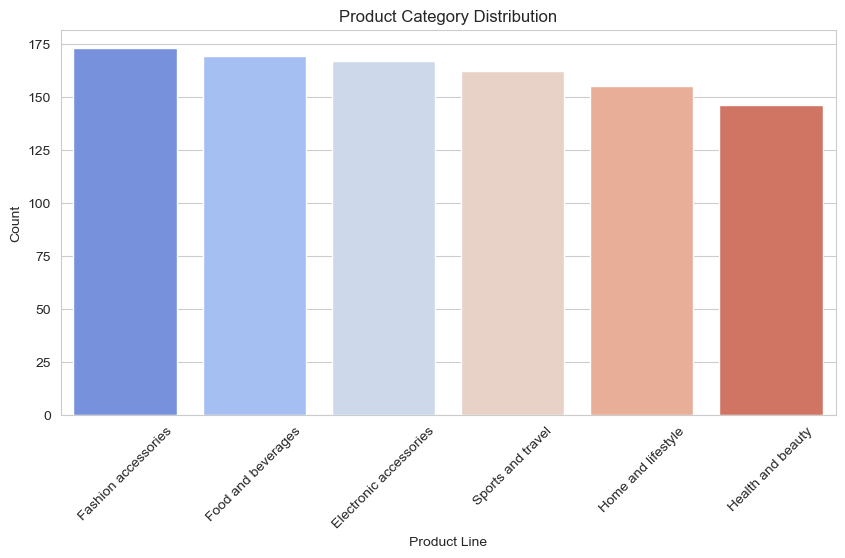

In [248]:
# Product Category Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Product line', data=df, palette='coolwarm', order=df['Product line'].value_counts().index)
plt.title("Product Category Distribution")
plt.xlabel("Product Line")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\VTE\AppData\Local\Temp\ipykernel_16360\4090356363.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Product line'], y=df['Quantity'], estimator=sum, ci=None, palette='muted')


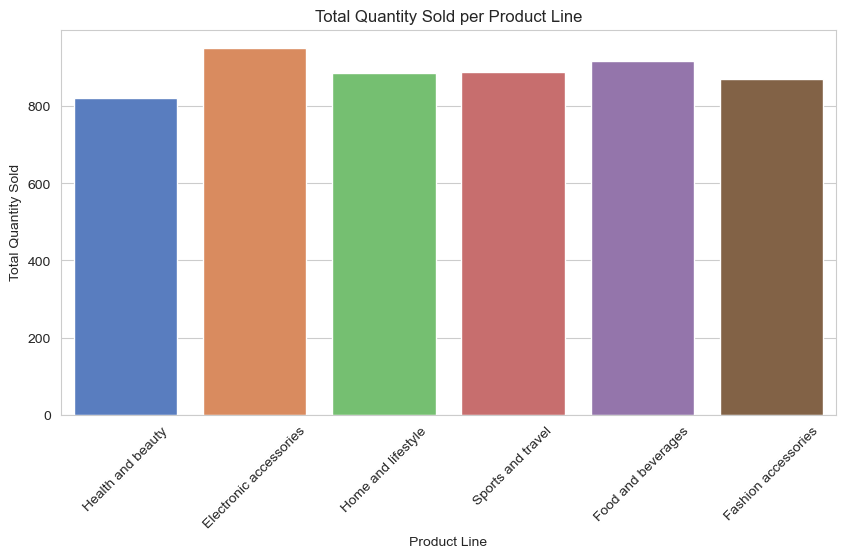

In [256]:
# Quantity Sold per Product Line
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Product line'], y=df['Quantity'], estimator=sum, ci=None, palette='muted')
plt.title("Total Quantity Sold per Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

C:\Users\VTE\AppData\Local\Temp\ipykernel_16360\917625060.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Product line'], y=df['Total'], estimator=sum, ci=None, palette='coolwarm')


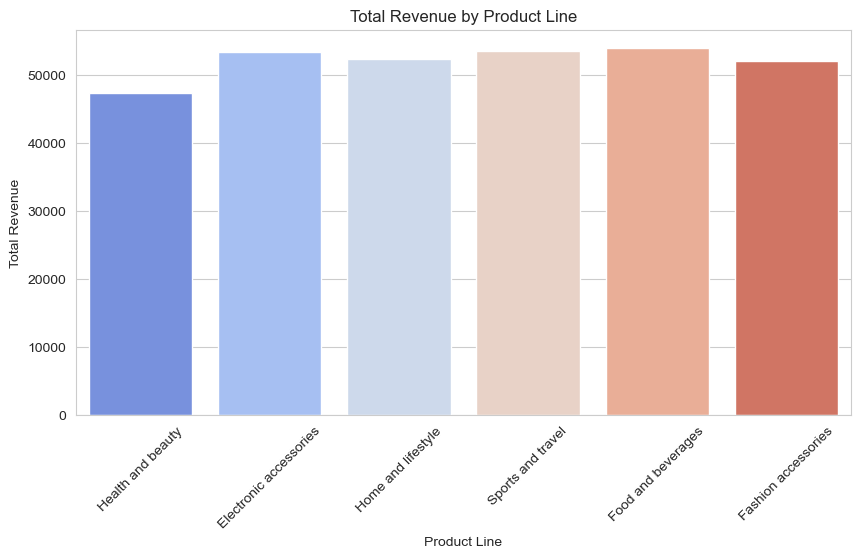

In [249]:
# Revenue by Product Line
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Product line'], y=df['Total'], estimator=sum, ci=None, palette='coolwarm')
plt.title("Total Revenue by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

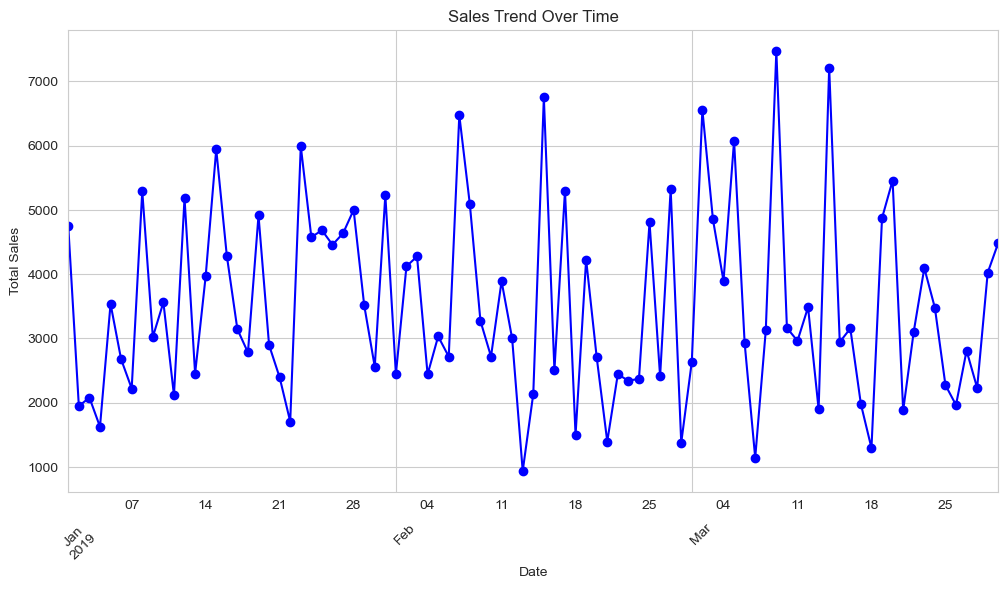

In [250]:
# Sales Trends Over Time
plt.figure(figsize=(12, 6))
df.groupby('Date')['Total'].sum().plot(marker='o', color='b')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

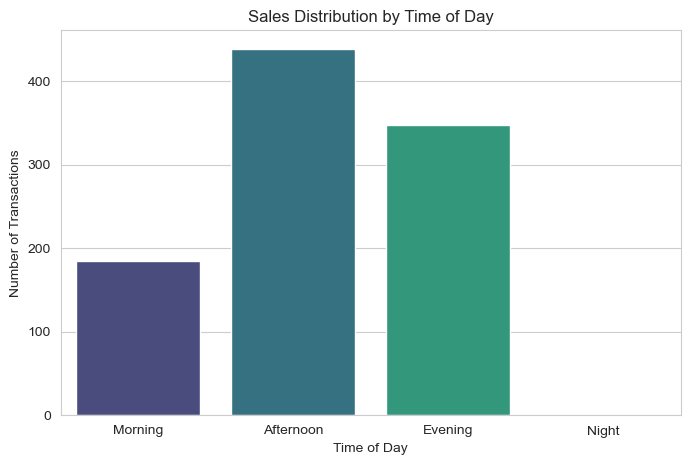

In [251]:
# Sales Distribution by Time of Day
plt.figure(figsize=(8, 5))
sns.countplot(x='Time of Day', data=df, order=['Morning', 'Afternoon', 'Evening', 'Night'], palette='viridis')
plt.title("Sales Distribution by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Transactions")
plt.show()

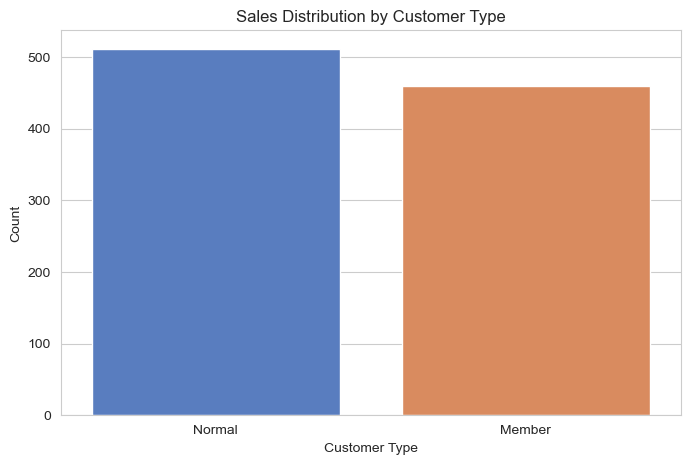

In [252]:
# Customer Type Analysis
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer type', data=df, palette='muted')
plt.title("Sales Distribution by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.show()


C:\Users\VTE\AppData\Local\Temp\ipykernel_16360\1288886977.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='City', y='Total', data=df, estimator=sum, ci=None, palette='viridis')


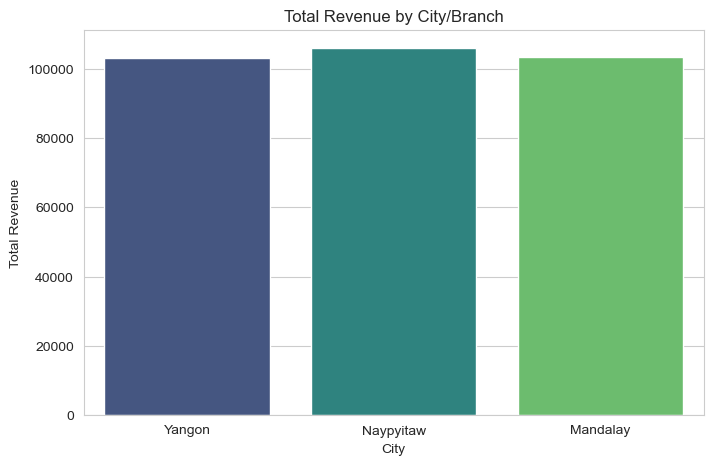

In [253]:
# Branch Performance Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='City', y='Total', data=df, estimator=sum, ci=None, palette='viridis')
plt.title("Total Revenue by City/Branch")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.show()

C:\Users\VTE\AppData\Local\Temp\ipykernel_16360\4291364486.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['Weekday'], y=df['Total'], estimator=sum, data=df, marker='o', color='b', ci=None)
c:\Users\VTE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\VTE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


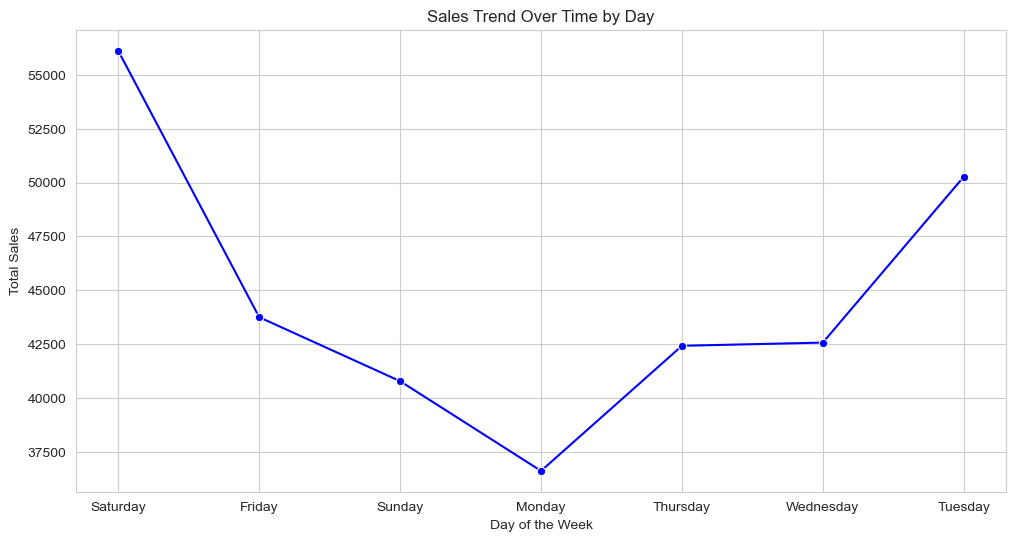

In [255]:
# 1. Sales Trends Over Time By Day
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Weekday'], y=df['Total'], estimator=sum, data=df, marker='o', color='b', ci=None)
plt.title("Sales Trend Over Time by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.show();

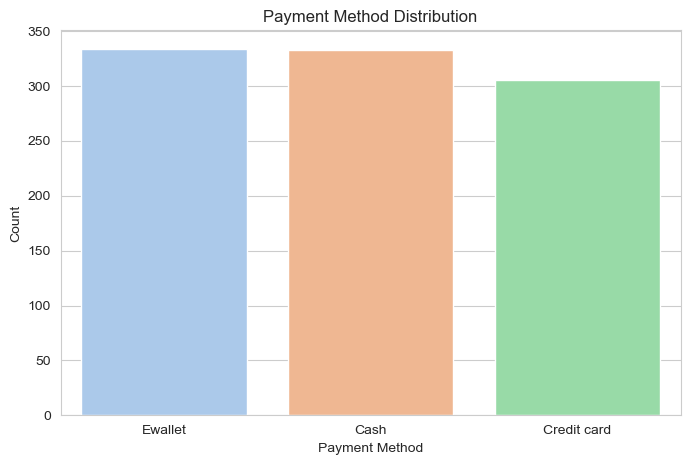

In [ ]:
# Payment Method Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Payment', data=df, palette='pastel')
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()